# C transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")
from legendre_fenchel import legendre_fenchel

In [3]:
def c_transform(x, phi, p):
    """costが c(x,p) = |x - p|^2 / 2 である時の、φ phi = φ(y)の c-transform "ψ(psi) = φ^c(p) = |p|^2/2 - φ(p)" を計算する.
    c-transform の値と、 legendre fenchel transform で sup(max) となる時の 座標の添字を return する.
    
     φ^c(p) = inf_x( c(x, p) -  φ(x))              y = f(x) = φ(x) 
            = inf_x( |x - p|^2 / 2 -  φ(x))
            = |p|^2 / 2 - sup_x( xp - (|x|^2 / 2 - φ(x)) ) 
            = |p|^2 / 2 - sup_x( xp - ψ(x) )        ψ(x) = |x|^2/2 - φ(x)       ①
            = |p|^2 / 2 - f^*(p)                                            ②
    
    """
    #p = x
    psi = 0.5 * x * x - phi                                  # ①
    t, index  = legendre_fenchel(x, psi, p)  #t = f^*(p)       ②
    
    return 0.5 * p * p - t, index  # phi^c(p) = |p|^2 / 2 - f^*(p)

cost関数$c$を$c(x, y) := \frac{|x-y|^2}{2}$とする.
このとき,c変換は以下のようになる.
\begin{align*}
    \phi^c(p) &= inf_x\{c(p, x) - \phi(x)\}\\
              &= inf_x\{\frac{|x-p|^2}{2} - \phi(x)\}\\
              &= \frac{|p|^2}{2} + inf_x[- \{x \cdot p - \frac{|x|^2}{2} + \phi(x) \}]\\
              &= \frac{|p|^2}{2} - sup_x[x \cdot p - \{\frac{|x|^2}{2} - \phi(x)\}]\\
              &= \frac{|p|^2}{2} - sup_x\{x \cdot p - \psi(x)\}\\
              &= \frac{|p|^2}{2} - \psi^*(p)\\
    \\
    \phi^{cc}(q) &= inf_p\{c(q, p) - \phi^c(p)\}\\
              &= inf_p\{\frac{|p-q|^2}{2} - \phi^c(p)\}\\
              &= \frac{|q|^2}{2} + inf_p[- \{p \cdot q - \frac{|p|^2}{2} + \phi^c(p) \}]\\
              &= \frac{|q|^2}{2} - sup_p[p \cdot q - \{\frac{|p|^2}{2} - \phi^c(p)\}]\\
              &= \frac{|q|^2}{2} - sup_p\{p \cdot q - \psi^c(p)\}   &= \frac{|q|^2}{2} - sup_p[p \cdot q - \{\frac{|p|^2}{2} - (\frac{|p|^2}{2} - f^*(p))\}] \\
              &= \frac{|q|^2}{2} - \psi^{**}(q)   &= \frac{|q|^2}{2} - sup_p\{p \cdot q + f^*(p)\}
\end{align*}


## Check program behavior

### Example. 1

1点のとき

$(x, y) = (0, 0)$. ただし,$y =  \phi(x)$.

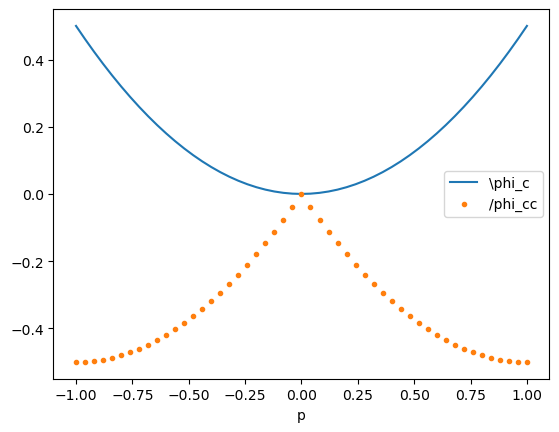

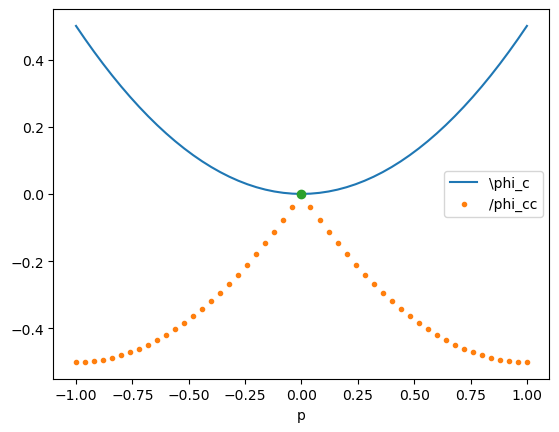

In [4]:
x = np.array([0])
y = np.array([0])
p = np.linspace(-1, 1, 51)
phi_c, iopt = c_transform(x, y, p)
plt.plot(p, phi_c, label=r'\phi_c')
phi_cc, _= c_transform(p, phi_c, p)
plt.plot(p, phi_cc, '.', label=r'/phi_cc')
#plt.plot(x, y, 'o')
plt.xlabel('p')
plt.legend()
plt.show()

x = np.array([0])
y = np.array([0])
p = np.linspace(-1, 1, 51)
phi_c, iopt = c_transform(x, y, p)
plt.plot(p, phi_c, label=r'\phi_c')
phi_cc, _= c_transform(p, phi_c, p)
plt.plot(p, phi_cc, '.', label=r'/phi_cc')
plt.plot(x, y, 'o')
plt.xlabel('p')
plt.legend()
plt.show()

$(x, y) = (0, 0), y = \phi(x)$.

\begin{align*}
    \phi^c(p) &= inf_{x \in {0}}\{\frac{|x-p|^2}{2} - \phi(x)\}\\
              &= \frac{|p|^2}{2} - 0 & (\because x = 0, \phi(x) = 0)\\
              &= \frac{|p|^2}{2}\\
              \\
    \phi^{cc}(q) &= inf_p\{\frac{|p - q|^2}{2} - \phi^c(p)\}\\
              &= inf_p\{\frac{|p - q|^2}{2} - \frac{|p|^2}{2}\} \\
              &= \frac{|q|^2}{2} - sup_p\{p \cdot q\}
\end{align*}

$
\phi^{c}(p) = \left\{
\begin{array}{ll}
    \frac{|p|^2}{2} & p \in \Omega\\
    - \infty & otherwise\\
\end{array}
\right.
$

$
\phi^{cc}(p) = \left\{
\begin{array}{ll}
    0 & (x, y) = (0, 0)\\
    - \infty & otherwise\\
\end{array}
\right.
$

1点の場合,$\phi^{cc} = \phi$が成立する.

### Example. 2

2点のとき

$(x, y) = \{(0, 0), (1, 1)\}$. ただし、$y =  \phi(x)$


\begin{align*}
    \phi^c(p) &= inf_{x \in \{0, 1\}}\{c(p, x) - \phi(x)\}\\
              &= min\{\frac{|p|^2}{2} - \phi(0), \frac{|p - 1|^2}{2} - \phi(1)\} & (\because inf = min)\\
              &= min\{\frac{|p|^2}{2}, \frac{|p - 1|^2}{2} - 1\} & (\because y(0) = \phi(0) = 0, y(1) = \phi(1) = 1)\\
              \\
    \phi^{cc}(q) &= inf_{p}\{c(q, p) - \phi^c(p)\}\\
                 &= inf_{p}\{\frac{|p - q|^2}{2} - min\{\frac{|p|^2}{2}, \frac{|p - 1|^2}{2} - 1\}\}\\
                 &= max\{\frac{|q|^2}{2} - sup_p(p \cdot q), \frac{|q|^2}{2} - sup_p(p \cdot (q - 1)) + 1\}\\
\end{align*}

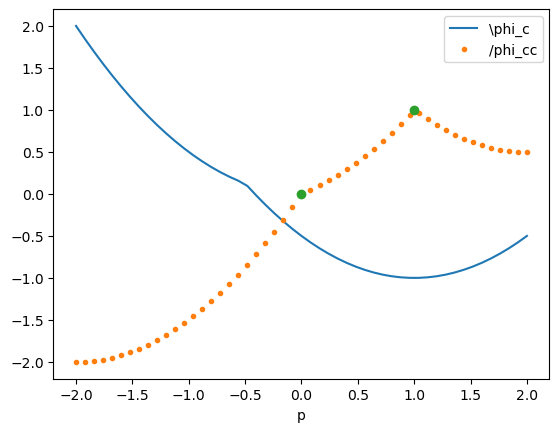

In [5]:
    x = np.array([0,1])
    y = np.array([0,1])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

$\phi^c(p)$のグラフを見ると, $p = - 0.5$の位置で, グラフが変化している.
これは, 
$\phi^c(p) = min\{\frac{|p|^2}{2}, \frac{|p - 1|^2}{2} - 1\}$
の大小を考えるとわかる.

$\phi^c$のグラフは$p$座標における,$\phi^c(p)$の値が小さい方が適用される.実際,

\begin{align*}
    \frac{|p|^2}{2} -  (\frac{|p - 1|^2}{2} - 1) = p + \frac{1}{2}\\\
    p + \frac{1}{2} < 0 \iff p < - \frac{1}{2}
\end{align*}
であるため,

\begin{align*}
\phi^{c}(p) = \left\{
\begin{array}{ll}
    \frac{|p|^2}{2} & (-2 \leq p < -\frac{1}{2})\\
    \frac{|p - 1|^2}{2} - 1 & (-\frac{1}{2} \leq p \leq 2)  \\
    - \infty & otherwise\\
\end{array}
\right.
\end{align*}

とわかる. また,

$\phi^{cc}(q) = inf_{p \in [2-,2]}[min\{\frac{|q|^2}{2} - sup_p(p \cdot q), \frac{|q|^2}{2} - sup_p(p \cdot (q - 1)) + 1\}]$

$(x, y) = \{(0, 0), (1, \phi(x))\}$としたとき,$\phi = \phi^{cc}$となる$phi(x)$の範囲を考える.

\begin{align*}
    \frac{|p|^2}{2} -  (\frac{|p - 1|^2}{2} - \phi(x)) = p - \frac{1}{2} + \phi(x)\\\
    p - \frac{1}{2} - \phi(x) < 0 \iff p < - \phi(x )+ \frac{1}{2} = 2  \qquad & (\because -2 \leq p \leq 2)
\end{align*}



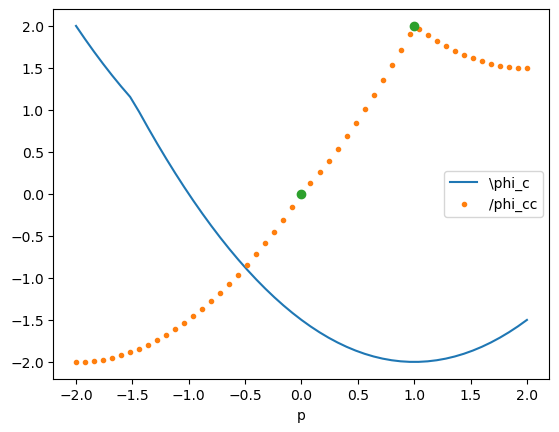

In [6]:
    x = np.array([0,1])
    y = np.array([0,2])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

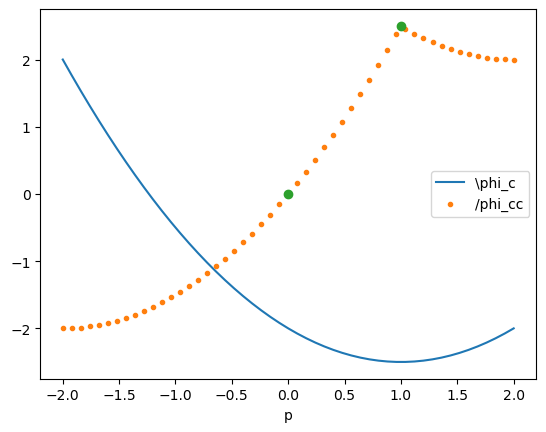

In [7]:
    x = np.array([0,1])
    y = np.array([0,2.5])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

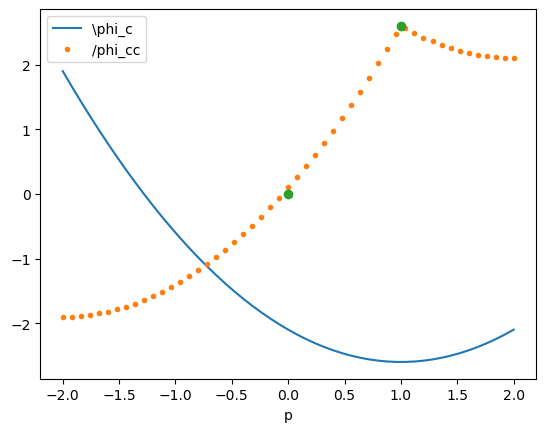

In [8]:
    x = np.array([0,1])
    y = np.array([0,2.6])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

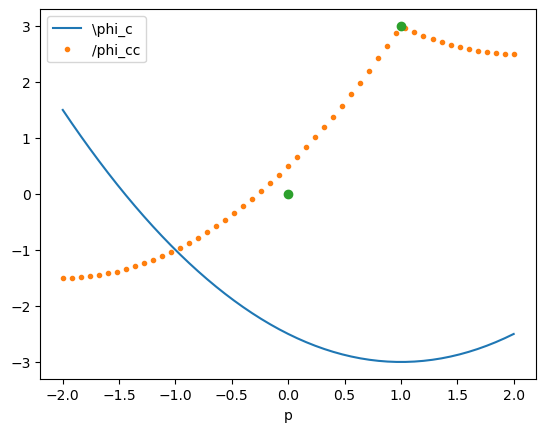

In [9]:
    x = np.array([0,1])
    y = np.array([0,3])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

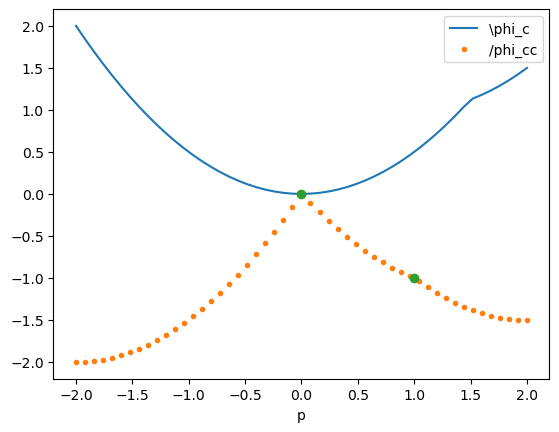

In [10]:
    x = np.array([0,1])
    y = np.array([0,-1])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

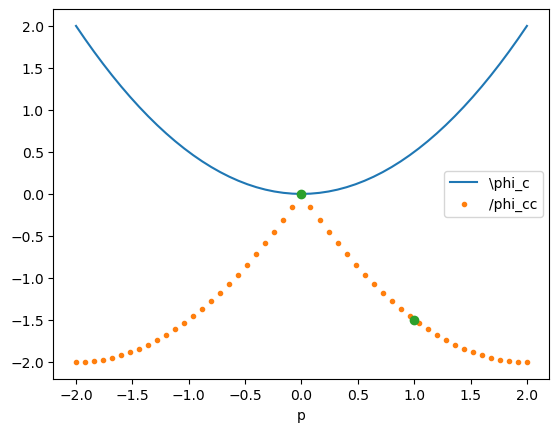

In [11]:
    x = np.array([0,1])
    y = np.array([0,-1.5])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

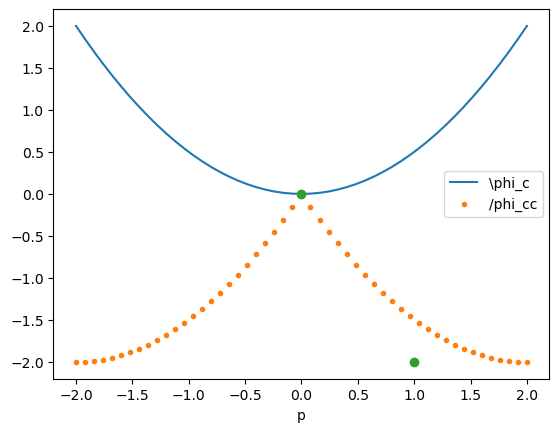

In [12]:
    x = np.array([0,1])
    y = np.array([0,-2])
    p = np.linspace(-2, 2, 51)
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

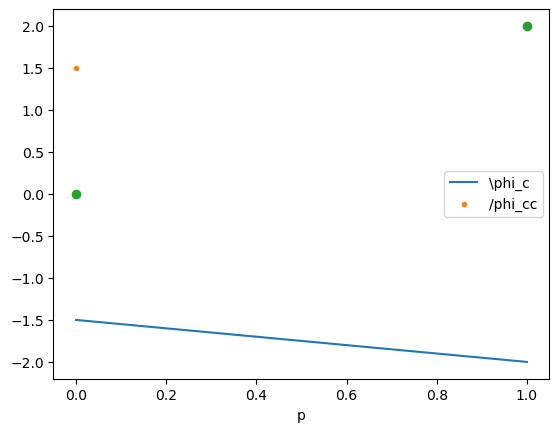

In [13]:
    x = np.array([0,1])
    y = np.array([0,2])
    p = x
    phi_c, iopt = c_transform(x, y, p)
    plt.plot(p, phi_c, label=r'\phi_c')
    phi_cc, _= c_transform(p, phi_c, p)
    plt.plot(p, phi_cc, '.',  label=r'/phi_cc')
    plt.plot(x, y, 'o')
    plt.xlabel('p')
    plt.legend()
    plt.show()

一般的な2点のC-transformを考える。


\begin{align*}
    \phi^c(p) &= inf_{x \in [a, b]}\{c(p, x) - \phi(x)\}\\
              &= min_{x \in [a, b]} \{\frac{|x - p|^2}{2} - \phi(x)\} & (\because inf = min) \\
              &= \left\{
                \begin{array}{ll}
                    min_{x \in [a, b]}\{\frac{|x - p|^2}{2} - \phi(x)\} & x \in [a, b]\\
                    - \infty & otherwise\\
                \end{array}
                \right.
\\
    \phi^{cc}(q) &= inf_{p \in [a, b]}\{c(p, q) - \phi^c(p)\}\\
                 &= inf_{p \in [a, b]}\{\frac{|p - q|^2}{2} - min_{x \in \{a, b\}}\{\frac{|x - p|^2}{2} - \phi(x)\}\\
                 &= inf_{p \in [a, b]}[\frac{|p|^2}{2} + \frac{|q|^2}{2} - p \cdot q + max_{x \in \{a, b\}}\{- \frac{|x|^2}{2} - \frac{|p|^2}{2} + p \cdot x + \phi(x)\}]\\
                 &= inf_{p \in [a, b]}[max_{x \in \{a, b\}}\{p \cdot (x - q)) - \frac{|x|^2}{2} + \phi(x)\}\ + \frac{|q|^2}{2}]\\
                 &= \left\{
                    \begin{array}{ll}
                        max_{x \in \{a, b\}}[\{a \cdot (x - q) - \frac{|x|^2}{2} + \phi(x)\}\ + \frac{|q|^2}{2}] & (x - q \ge 0)\\
                        max_{x \in \{a, b\}}[\{b \cdot (x - q) - \frac{|x|^2}{2} + \phi(x)\}\ + \frac{|q|^2}{2}] & (x - q < 0)\\ 
                    \end{array}
                \right.
\end{align*}

$\phi^{cc}$の最小値を考える。$y = ax^2 + bx + c$のとき、最小値は$- \frac{b}{2a}$である.

$\phi^{cc} = max_{x \in \{a, b\}}[\{a \cdot (x - q) - \frac{|x|^2}{2} + \phi(x)\}\ + \frac{|q|^2}{2}]$ のとき
最小値は$a$.

$\phi^{cc} = max_{x \in \{a, b\}}[\{b \cdot (x - q) - \frac{|x|^2}{2} + \phi(x)\}\ + \frac{|q|^2}{2}]$ のとき
最小値は$b$.

### $\phi(x) = \frac{x^2}{2}$ のとき

$x \in [10, 10], p = x$

$y = \phi(x) = \left\{
    \begin{array}{ll}
        \frac{1}{2}x^2 \\
        - \infty & otherwise\\
    \end{array}
\right.
$

\begin{align*}
    \phi^c(p) &= inf_{x \in [-10, 10]}\{c(p, x) - \phi(x)\}\\
              &= inf_{x \in [-10, 10]}\{\frac{|x-p|^2}{2} - \frac{1}{2}x^2\}\\
              &= \frac{|p|^2}{2} + inf_{x \in [-10, 10]}[- \{x \cdot p - \frac{|x|^2}{2} + \frac{1}{2}x^2 \}]\\
              &= \frac{|p|^2}{2} - sup_{x \in [-10, 10]}\{x \cdot p\}\\
              &= \left\{
                \begin{array}{ll}
                    10p + \frac{|p|^2}{2} & p \le 0 \\
                    -10p + \frac{|p|^2}{2} & p > 0\\
                \end{array}
                \right.
\end{align*}

\begin{align*}
    \phi^{cc}(x) &= inf_{x \in [-10, 10]}\{c(p, x) - \phi(x)\}\\
              &= inf_{x \in [-10, 10]}\{\frac{|x-p|^2}{2} - \frac{1}{2}x^2\}\\
              &= \frac{|p|^2}{2} + inf_{x \in [-10, 10]}[- \{x \cdot p - \frac{|x|^2}{2} + \frac{1}{2}x^2 \}]\\
              &= \frac{|p|^2}{2} - sup_{x \in [-10, 10]}\{x \cdot p\}\\
              &= \frac{|p|^2}{2}          \,   (\because x = p, x\cdot p \ge 0)\\
\end{align*}


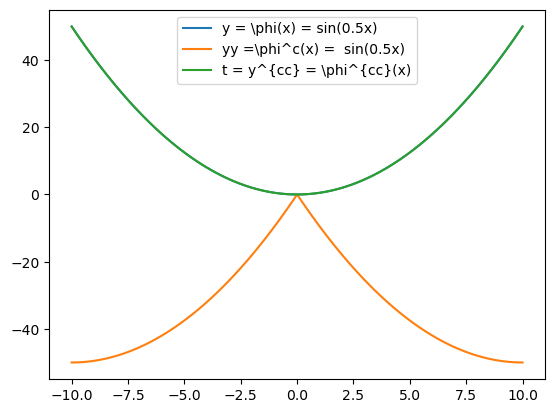

In [14]:
x = np.linspace(-10, 10, 101)
p = x
#y = np.random.random(len(x))
#y = np.sin(0.5 * x)
y = 0.5 * x * x
#y = 0 * x

yy, _ = c_transform(x, y, p)
t, iopt = c_transform(p, yy, x)
plt.plot(x, y, label=r'y = \phi(x) = sin(0.5x)')
plt.plot(x, yy, label=r'yy =\phi^c(x) =  sin(0.5x)')
plt.plot(x, t, label=r't = y^{cc} = \phi^{cc}(x)')
plt.legend()

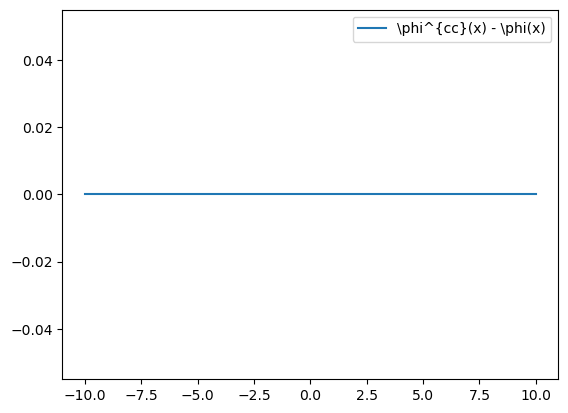

In [15]:
plt.plot(x, t - y, label=r'\phi^{cc}(x) - \phi(x)')
plt.legend()

### $\phi(x) \le \phi^{cc}(x)$ for every $x$

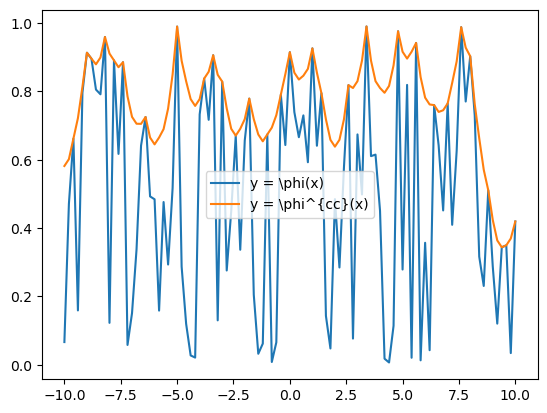

In [24]:
x = np.linspace(-10, 10, 101)
p = x
y = np.random.random(len(x))

plt.plot(x, y, label=r'y = \phi(x)')

t, _ = c_transform(x, y, p)

t, iopt = c_transform(p, t, p)
plt.plot(x, t, label=r'y = \phi^{cc}(x)')
plt.legend()
plt.show()


### Jacobs-Leger Lemma 1(ii)
If $\phi$ is c-concave, the minimization problem $inf_{y}c(x,y) - \phi(y)$ has a unique minimizer $T_{\phi}(x)$ for almost every $x$. 

Furthermore, if $c(x, y) = h(x - y)$, we have the explicit formula:
\begin{align*}
    T_{\phi}(x) = x - (\nabla h)^{-1}(\nabla \phi^c(x)),
\end{align*}

Consider $c(x, y) = \frac{|x - y|^2}{2}$. Then
\begin{align*}
    T_{\phi}(x) = x - \nabla \phi^c(x).
\end{align*}

Proof

\begin{align*}
    h(x-y) &= \frac{|x - y|^2}{2}, &  (h(x) = \frac{|x|^2}{2}),\\
    \nabla h(x-y) &= \nabla \frac{|x - y|^2}{2} = (x-y, x-y)\\
    \nabla h(\nabla \phi^c(x)) &= \nabla  \phi^c(x), & (\nabla h(x) = \nabla \frac{|x|^2}{2} = x),\\
    \Rightarrow (\nabla h)^{-1}(\nabla \phi^c(x)) &= \nabla \phi^c(x)\\
    T_{\phi}(x) &= x - (\nabla h)^{-1}(\nabla \phi^c(x)),\\
    \Rightarrow &= x - \nabla \phi^c(x)
    
\end{align*}

よって、
\begin{align*}
    T_{\phi}(x) = x - \nabla \phi^c(x),\\
    T_{\phi^c}(x) = x - \nabla \phi^{cc}(x).\\
\end{align*}

ここで、$y = \phi(x) = \frac{x^2}{2}$より, $\phi^{cc}(x) = \frac{x^2}{2}$, $\nabla \phi^{cc}(x) = x$であるので, 
\begin{align*}
    T_{\phi^c}(x) &= x - \nabla \phi^{cc}(x).\\
                &= x - x = 0\\
\end{align*}

つまり,$c(x, y) = \frac{|x - y|^2}{2}, y = \phi(x) = \frac{|x|^2}{2} $,とするとき, 
$\nu \rightarrow \mu$ へのtransport mapは $\mu$の値を全て$\nu$ の $x$ 座標 $= 0$の点に移すmapである.

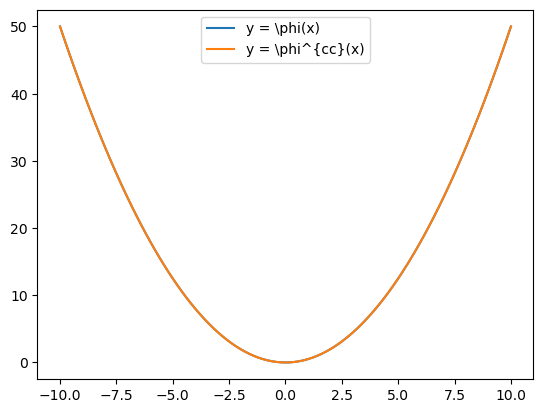

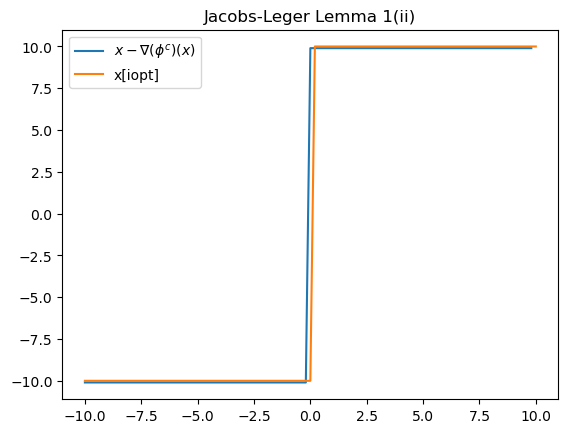

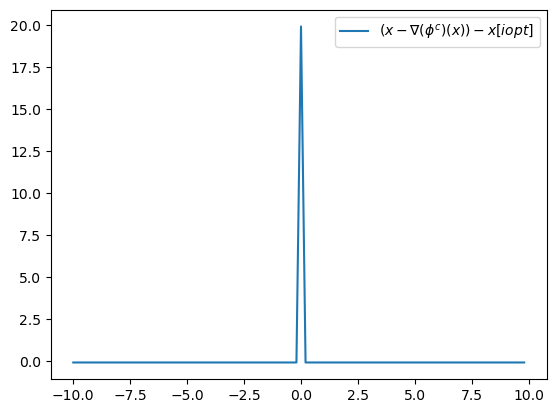

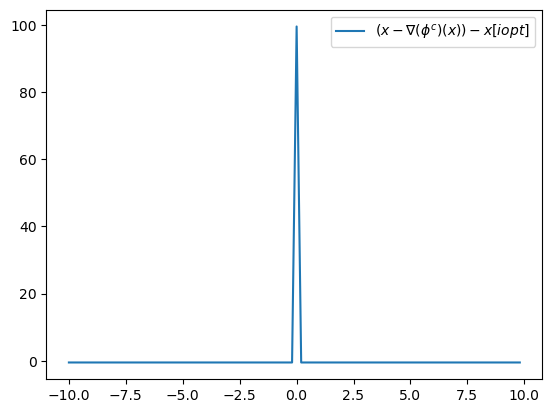

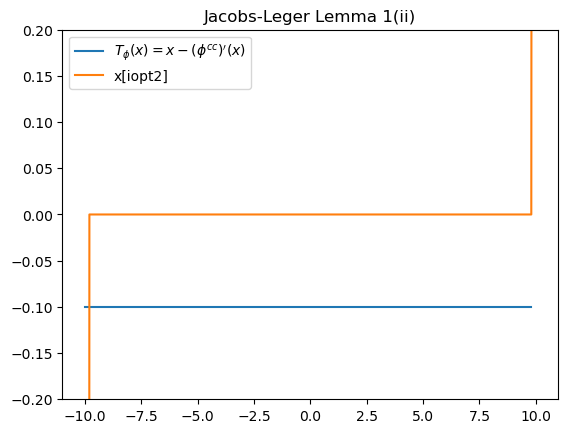

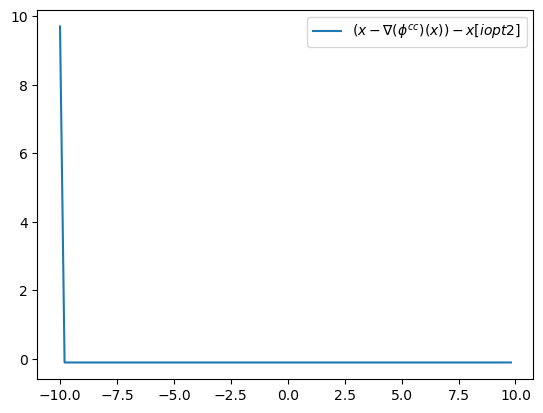

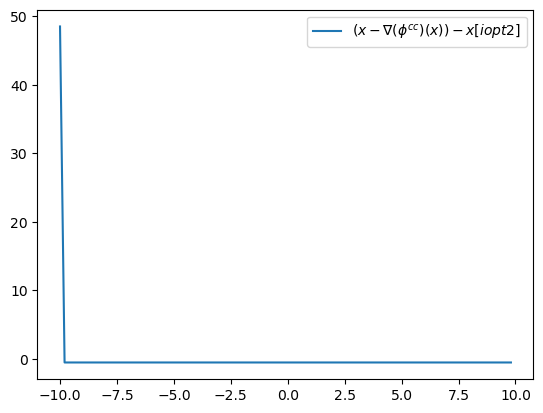

In [59]:
x = np.linspace(-10, 10, 101)
y = np.sin(0.5 * x) # y = phi
p = x
y = 0.5 * x * x

plt.plot(x, y, label=r'y = \phi(x)')

phi_c, iopt = c_transform(x, y, p)
# plt.plot(x, t)
phi_cc, iopt2 = c_transform(p, phi_c, p)
plt.plot(x, phi_cc, label=r'y = \phi^{cc}(x)')
plt.legend()
plt.show()


""" testing the discrete version of Jacobs-Leger Lemma 1(ii)"""

plt.title('Jacobs-Leger Lemma 1(ii)')
plt.plot(x[:-1], x[:-1] - (phi_c[1:] - phi_c[:-1]) / (x[1:] - x[:-1]), label=r"$x - \nabla(\phi^c)(x)$") 
plt.plot(x, x[iopt], label='x[iopt]')
plt.legend()
plt.show()

plt.plot(x[:-1], (x[:-1] - (phi_c[1:] - phi_c[:-1]) / (x[1:] - x[:-1])) - x[iopt][:-1], label=r"$(x - \nabla (\phi^{c})(x)) - x[iopt]$")
plt.legend()
plt.show()

plt.plot(x[:-1], (x[:-1] - (phi_c[1:] - phi_c[:-1]) / (x[1:] - x[:-1])- x[iopt][:-1])/(x[1] - x[0]), label=r"$(x - \nabla (\phi^{c})(x)) - x[iopt]$")
plt.legend()
plt.show()

plt.title('Jacobs-Leger Lemma 1(ii)')
plt.plot(x[:-1], x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1]), label=r"$T_{\phi}(x) = x - (\phi^{cc})'(x)$") 
plt.plot(x, x[iopt2], label='x[iopt2]')
plt.ylim(-0.2,0.2)
plt.legend()
plt.show()

plt.plot(x[:-1], (x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1])) - x[iopt2][:-1], label=r"$(x - \nabla (\phi^{cc})(x)) - x[iopt2]$")
plt.legend()
plt.show()
plt.plot(x[:-1], (x[:-1] - (phi_cc[1:] - phi_cc[:-1]) / (x[1:] - x[:-1])- x[iopt2][:-1])/(x[1] - x[0]), label=r"$(x - \nabla (\phi^{cc})(x)) - x[iopt2]$")
plt.legend()
plt.show()


$T_{\phi}(x)$には2通りの表し方がある.

\begin{align*}
    T_{\phi^c}(x) &= x - (\nabla h)^{-1}(\nabla \phi^c(x)) = x - \nabla \phi^{cc}(x).\\
                &= x[iopt2]
\end{align*}